In [1]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import matplotlib.cm as cm
import matplotlib.ticker as ticker
import seaborn as sns
sns.set(style="white", context="talk")
import warnings
warnings.filterwarnings('ignore')
from scipy.ndimage.filters import gaussian_filter
from scipy.stats import norm,lognorm
from scipy.stats import shapiro, normaltest

# Phase diagram plot

In [2]:
def plot_phase(mu,sigma,Omega,lines=True, save=False, title=None):
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111)
    ax.set_yscale('log',basey=10)

    ## The body of the plot
    main_cs = ax.contourf(mu,sigma,Omega,levels=np.linspace(0,1,50),cmap='RdYlBu')

    #the color bar
    cbar = fig.colorbar(main_cs, ticks=np.linspace(0,1,5))

    #add lines in the main body of the plot (the levels)
    if lines:
        lines_cs = ax.contour(mu,sigma,Omega,levels=[0, 0.25, 0.5, 0.75,1],colors=['k'])
        #lables on the plot itself
        ax.clabel(lines_cs,lines_cs.levels,inline=True,fmt="%1.2f",fontsize=35)
        #label the color bar
        cbar.add_lines(lines_cs)
        
    cbar.ax.set_title("Ω",fontsize=40)

    ##Label the body of the plot
    ax.set_xlabel("Systematic bias, μ",fontsize=30)
    ax.set_ylabel('Dispersion, σ',fontsize=30)

    #ax.set_xlim(-2.99,2.99)
    ax.set_ylim(0.1,10)
    ax.tick_params(labelsize=30)

    ax.set_yticks((0.1,1,10))
    ax.set_yticklabels((0.1,1,10))

    if save:
        plt.savefig('./fig2_phase_diagram_'+str(title)+'.pdf', bbox_inches='tight')

# Gaussian

In [3]:
filen = open('../data/simulation_data/gaussian_omega.pickle','rb')
μ,σ,Ω = pickle.load(filen)
filen.close()
sigma = 5
data = np.matrix.round(gaussian_filter(Ω, sigma),2) ## Most of the data is ~0.5.
print(data.shape)
μμ,σσ = np.meshgrid(μ,σ) 

(301, 201)


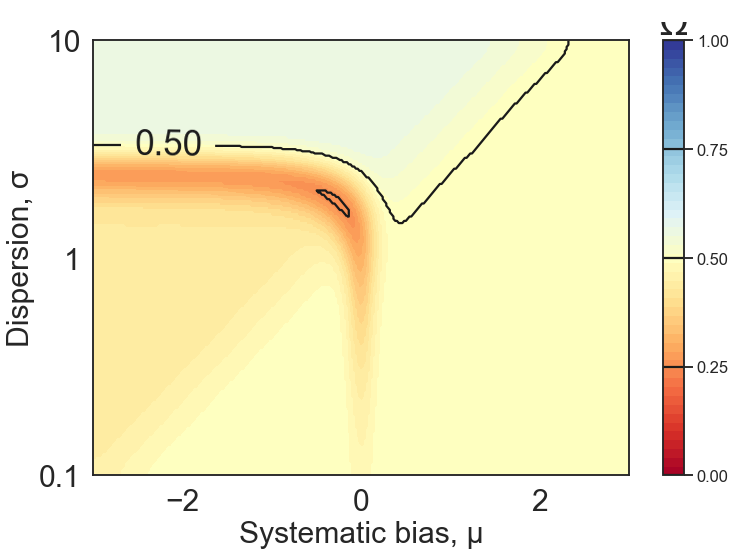

In [4]:
plot_phase(μμ,σσ,data.T,lines=True,save=True,title="guassian")

# Log normal

In [5]:
filen = open('../data/simulation_data/lognormal.pickle','rb')
μ,σ,Ω = pickle.load(filen)
filen.close()
sigma = 5
Ω = Ω[88:,:] #the [100:] is to get the [-3,3] values from mu rather than [-5,3]
μ = μ[88:] #the [100:] is to get the [-3,3] values from mu rather than [-5,3]
data = np.matrix.round(gaussian_filter(Ω, sigma),4)
μμ,σσ = np.meshgrid(μ,σ) 

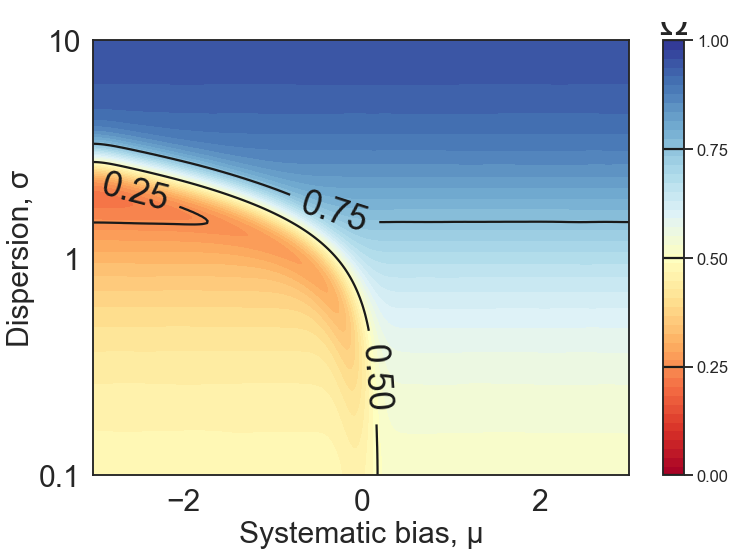

In [6]:
plot_phase(μμ,σσ,data.T,lines=True,save=True,title="lognormal")

# Log-Laplace

In [7]:
filen = open('../data/simulation_data/loglaplace_omega.pickle','rb')
μ,σ,Ω = pickle.load(filen)
filen.close()
sigma = 5
data = np.matrix.round(gaussian_filter(Ω, sigma),4)
μμ,σσ = np.meshgrid(μ,σ) 

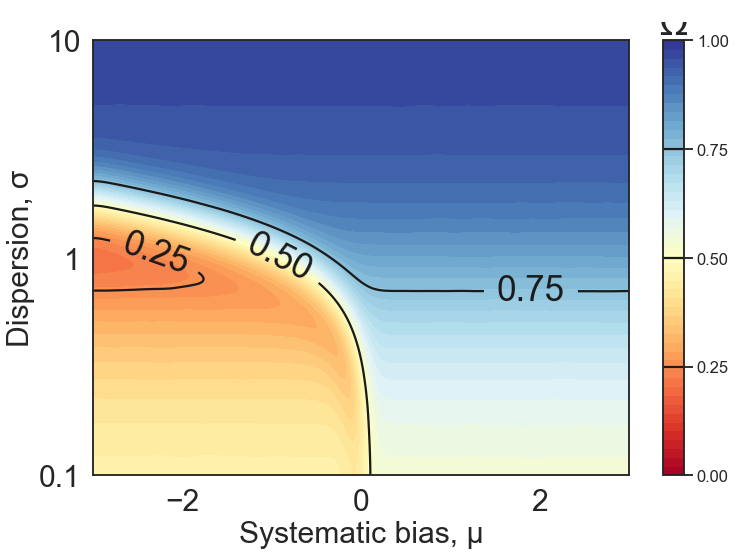

In [8]:
plot_phase(μμ,σσ,data.T,lines=True,save=True,title="log-laplace")

# Pareto

In [9]:
filen = open('../data/simulation_data/pareto_omega.pickle','rb')
μ,σ,Ω = pickle.load(filen)
filen.close()
sigma = 5
data = np.matrix.round(gaussian_filter(Ω, sigma),4)
μμ,σσ = np.meshgrid(μ,σ) 

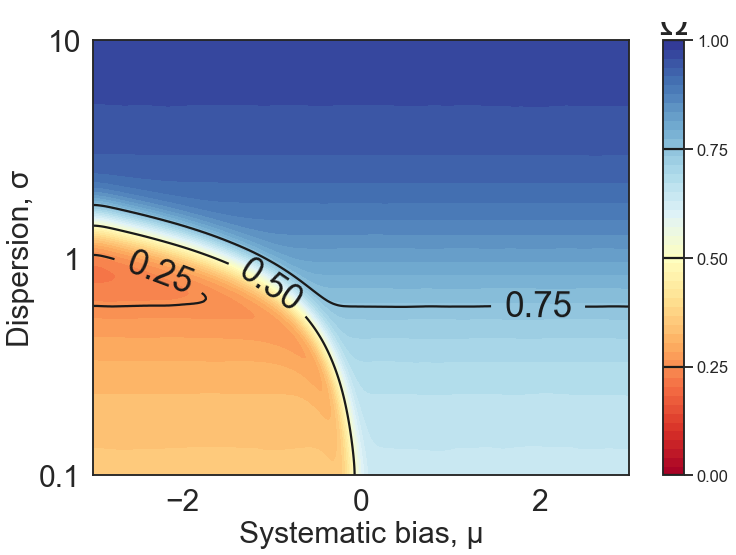

In [10]:
plot_phase(μμ,σσ,data.T,lines=True,save=True,title="pareto")